In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cargar el archivo 
df = pd.read_csv("C:/Users/Administrador/OneDrive/Desktop/base.csv")
df.head() # Es importante visualizar las 5 primeras filas para asegurarnos que todo se cargo correctamente desde la cabeza


,Factura,Fecha Factura,Cod Producto,Producto,Cantidad,Valor Unidad,Valor Iva
0,A-53298,6/2/2021,p001,Celular,5,723,137.37
1,A-64357,11/1/2023,p003,Teclado,5,50,9.50
2,A-47834,12/24/2020,p004,Televisor,5,996,189.24
3,A-34324,3/13/2022,p009,Cargador,3,146,27.74
4,A-84602,3/8/2024,p008,Parlantes,3,100,19.00


In [3]:
df.tail() # Es importante visualizar las 5 ultimas filas para asegurarnos que todo esta hasta el final

,Factura,Fecha Factura,Cod Producto,Producto,Cantidad,Valor Unidad,Valor Iva
132,A-16551,7/4/2022,p005,Reloj,5,296,56.24
133,A-73917,11/13/2022,p010,Monitor,1,413,78.47
134,A-76932,4/19/2020,p001,Celular,1,723,137.37
135,A-16551,7/4/2022,p001,Celular,3,723,137.37
136,A-73917,11/13/2022,p005,Reloj,5,296,56.24


In [ ]:
df.info() # En este resultado podemos ver que no hay valores nulos, pero hay un detalle a corregir, colocar la columna fecha como tipo fecha.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Factura        137 non-null    object 
 1   Fecha Factura  137 non-null    object 
 2   Cod Producto   137 non-null    object 
 3   Producto       137 non-null    object 
 4   Cantidad       137 non-null    int64  
 5   Valor Unidad   137 non-null    int64  
 6   Valor Iva      137 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 7.6+ KB


In [15]:
df["Fecha Factura"] = pd.to_datetime(df["Fecha Factura"]) # aqui corregimos el error ya antes mencionados


In [ ]:
df.dtypes # con este comando nos aseguramos de que la ejecucion anterior se hizo exitosamente


Factura                  object
Fecha Factura    datetime64[ns]
Cod Producto             object
Producto                 object
Cantidad                  int64
Valor Unidad              int64
Valor Iva               float64
dtype: object

In [ ]:
df["Fecha Factura"].head() # Muestra las primeras 5 fechas para verificar que la conversión a formato fecha fue exitosa.


0   2021-06-02
1   2023-11-01
2   2020-12-24
3   2022-03-13
4   2024-03-08
Name: Fecha Factura, dtype: datetime64[ns]

In [ ]:
df.describe() # Muestra estadísticas clave para entender la dispersión y tendencia de las variables numéricas.

,Fecha Factura,Cantidad,Valor Unidad,Valor Iva
count,137,137.000000,137.000000,137.000000
mean,2022-09-17 19:47:44.233576704,3.131387,417.751825,79.372847
min,2020-04-19 00:00:00,1.000000,50.000000,9.500000
25%,2021-07-26 00:00:00,2.000000,146.000000,27.740000
50%,2022-10-01 00:00:00,3.000000,413.000000,78.470000
75%,2023-11-01 00:00:00,5.000000,723.000000,137.370000
max,2024-12-14 00:00:00,5.000000,996.000000,189.240000
std,NaN,1.494192,308.468412,58.608998


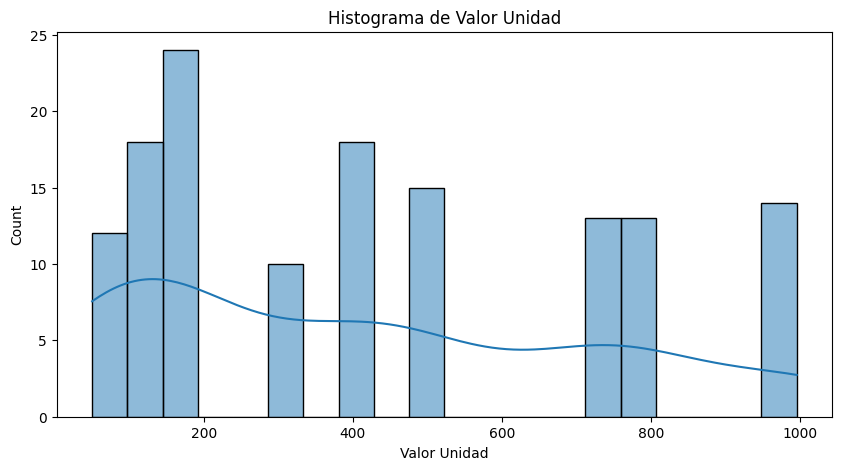

In [ ]:
# Histograma: muestra cómo se distribuyen los datos
plt.figure(figsize=(10,5))
sns.histplot(df["Valor Unidad"], bins=20, kde=True)
plt.title("Histograma de Valor Unidad")
plt.show()

In [ ]:
#LIMPIEZA DE LOS DATOS 
df.isnull().sum() # segun el resultado de este comando no hay que valores nulos


Factura          0
Fecha Factura    0
Cod Producto     0
Producto         0
Cantidad         0
Valor Unidad     0
Valor Iva        0
dtype: int64

In [5]:
df.head()

,Factura,Fecha Factura,Cod Producto,Producto,Cantidad,Valor Unidad,Valor Iva
0,A-53298,6/2/2021,p001,Celular,5,723,137.37
1,A-64357,11/1/2023,p003,Teclado,5,50,9.50
2,A-47834,12/24/2020,p004,Televisor,5,996,189.24
3,A-34324,3/13/2022,p009,Cargador,3,146,27.74
4,A-84602,3/8/2024,p008,Parlantes,3,100,19.00


In [12]:
df.groupby('Producto')['Cantidad'].sum()


Producto
Audífonos     51
Cargador      19
Celular       44
Computador    48
Monitor       48
Parlantes     59
Reloj         35
Tablet        37
Teclado       35
Televisor     53
Name: Cantidad, dtype: int64

<Axes: xlabel='Producto'>

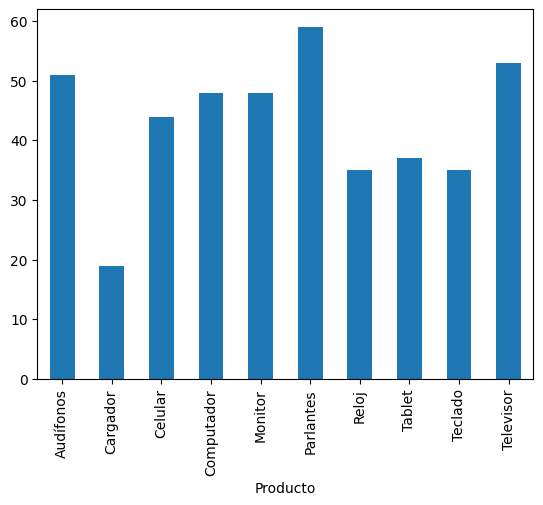

In [ ]:
ventas_por_producto = df.groupby('Producto')['Cantidad'].sum() # Agrupa las ventas por producto y suma la cantidad vendida de cada uno.
ventas_por_producto.plot(kind='bar') # Grafica la cantidad total vendida por producto en un gráfico de barras.
# Ahi podemos ver que el producto que mas se vendio fue el parlante y luego telvisores, siguiendole audifonos


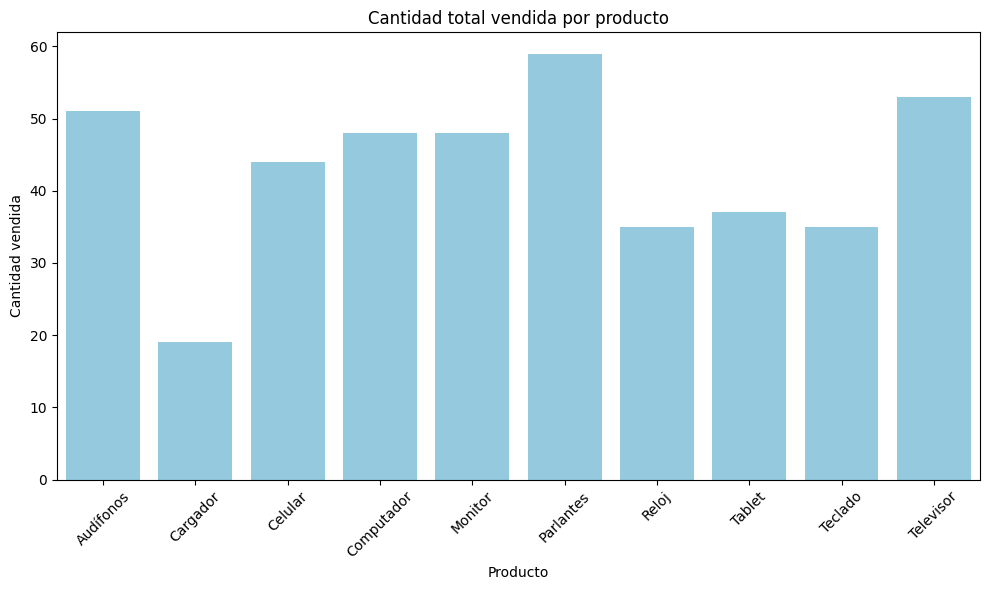

In [ ]:
ventas_por_producto = df.groupby('Producto')['Cantidad'].sum().reset_index() # este es el mismo grafico pero con la libreria sns.
plt.figure(figsize=(10,6))
sns.barplot(data=ventas_por_producto, x='Producto', y='Cantidad', color='skyblue')
plt.title("Cantidad total vendida por producto")
plt.xlabel("Producto")
plt.ylabel("Cantidad vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Cantidad total vendida por producto'}, xlabel='Producto', ylabel='Cantidad'>

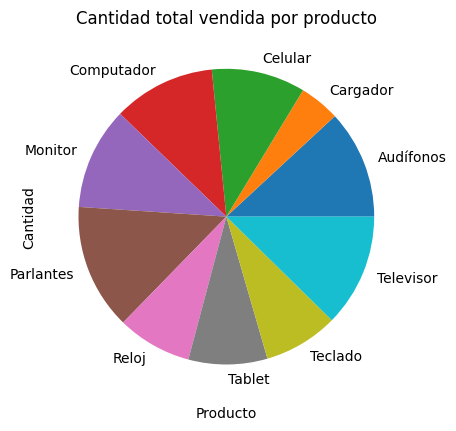

In [27]:
ventas_por_producto = df.groupby('Producto')['Cantidad'].sum() # aqui la misma grafica pero forma de una torta
plt.title("Cantidad total vendida por producto")
plt.xlabel("Producto")
plt.ylabel("Cantidad vendida")
ventas_por_producto.plot(kind='pie')



<Axes: xlabel='Producto'>

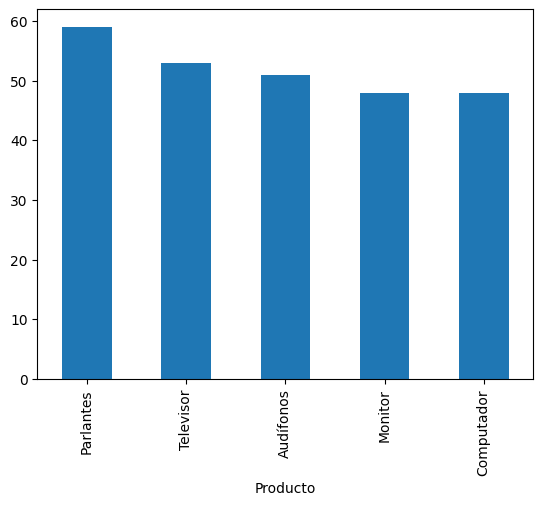

In [ ]:

ventas_por_producto.sort_values(ascending=False).head(5).plot(kind='bar') # este es un grafico de los 5 productos mas vendidos.


In [31]:
print("\nEDA finalizado.")


EDA finalizado.
